# 0.0 Import Libraries

In [5]:
import pandas as pd
import numpy as np

from sklearn import metrics as mt
from sklearn.cluster import AffinityPropagation

from matplotlib import pyplot as plt

import warnings

# 0.1 Loading Dataset

In [2]:
X = pd.read_csv("X_dataset.csv")

In [3]:
X.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


In [4]:
X.shape

(178, 13)

# 1.0 Affinity Propagation

In [22]:
warnings.filterwarnings('ignore')

preference_list = np.arange(-1, -51, -1)
ss_list = []

for i in preference_list:
    #define
    model = AffinityPropagation(preference=i)
    # fit
    model.fit(X)
    # predict
    labels = model.predict(X)
    # metrics
    ss = np.round(mt.silhouette_score(X, labels), 3)
    ss_list.append(ss)

Text(0, 0.5, 'Silhouette Score')

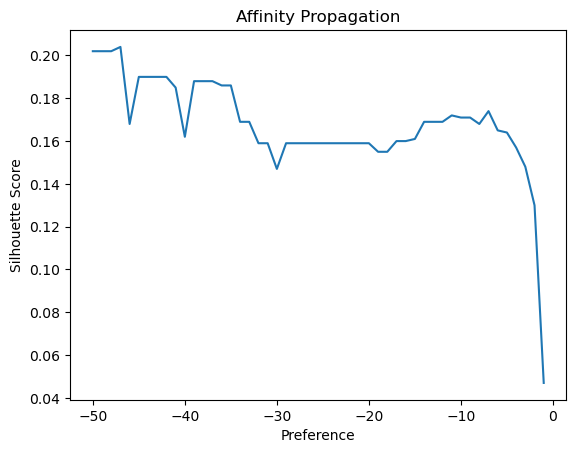

In [24]:
# plot
plt.plot(preference_list, ss_list)
plt.title('Affinity Propagation')
plt.xlabel ('Preference')
plt.ylabel ('Silhouette Score')

In [25]:
# Max Silhouette Score Value
ss_max = max(ss_list)
ss_max


0.204

In [28]:
# Max Silhouette Score Index
index = ss_list.index(ss_max)
index

46

In [29]:
# Preference Value
preference_list[index]

-47

In [30]:
# Number of Clusters
n_clusters = len(np.unique(labels))
n_clusters

7